Задания необходимо оформить в формате ipython-notebook (.ipynb). На code style будет так же обращено внимание.

### Задача #1 - Python
- На языке python 3 версии и новее и без использования сторонних библиотек напишите функцию, считывающую с пользовательского ввода целое неотрицательное число $n$, а затем выводящую это число в ячейку вместе с преобразованным словом "программист". $ 0 <= n <= 1000$. Например: 0 программистов, 4 программиста, 11 программистов.

In [448]:
def func_prog(n):
    s = ''
    if ((n % 100) <20) & ((n % 100) > 10):
        s += str(n) +"  программистов"
        return s
    n_mod = n % 10
    t = {1}
    ta = {2 , 3 , 4}
    tov = {5, 6, 7, 8, 9, 0}
    
    if n_mod in t:
        s += str(n) +"  программист"
    elif n_mod in ta:
        s += str(n) +"  программиста"
    elif n_mod in tov:
        s += str(n) +"  программистов"
    return s

In [457]:
func_prog(11)

'11  программистов'

Надеюсь я не забыла падежи =)))


### Задача #2 - SQL
Даны таблицы:
- DEPARTMENTS, с полями: ID (int, pk), NAME (string)
- STAFF, с полями: ID (int, pk), ID_LEAD (int), ID_DEP (int), NAME (string), SALARY (float).
<br> Таблицы DEPARTMENTS и STAFF связаны с помощью полей DEPARTMENTS.ID и STAFF.ID_DEP

Напишите SQL запрос для решения следующих задач:
- Выведите наименование отдела с наибольшим числом сотрудников
- Выведите ID сотрудников с зарплатой выше, чем у руководителя
- Выведите ID отделов, число сотрудников в которых меньше 3 человек

In [585]:
# Пример таблиц
import pandas as pd
DEPARTMENTS = pd.DataFrame({'ID':[1,2,3,4], 'NAME': ['Отдел разработки','Отдел CRM','Служба безопасности','Риски']})
DEPARTMENTS

,ID,NAME
0,1,Отдел разработки
1,2,Отдел CRM
2,3,Служба безопасности
3,4,Риски


In [677]:
# Пример таблиц
STAFF = pd.DataFrame({
    'ID':[1,2,3,4], 
    'ID_LEAD': [2,2,3,4],
    'ID_DEP': [1,1,3,4],
    'NAME': ['ИВАН', 'МАКСИМ', 'АЛЕКСАНДРА', 'МАРИЯ'],
    'SALARY': [9400000.00, 138000.33, 192003.22, 57800],
})
STAFF

,ID,ID_LEAD,ID_DEP,NAME,SALARY
0,1,2,1,ИВАН,9400000.00
1,2,2,1,МАКСИМ,138000.33
2,3,3,3,АЛЕКСАНДРА,192003.22
3,4,4,4,МАРИЯ,57800.00


* Выведите наименование отдела с наибольшим числом сотрудников

In [594]:
Staff_Dep = pd.merge(DEPARTMENTS, STAFF, how='left', left_on=['ID'], right_on=['ID_DEP']).fillna(0)

In [634]:
Staff_Dep.ID_y = np.where(Staff_Dep.ID_y>0 ,1,0)

In [635]:
Staff_Dep

,ID_x,NAME_x,ID_y,ID_LEAD,ID_DEP,NAME_y,SALARY
0,1,Отдел разработки,1,2.0,1.0,ИВАН,94000.00
1,1,Отдел разработки,1,2.0,1.0,МАКСИМ,138000.33
2,2,Отдел CRM,0,0.0,0.0,0,0.00
3,3,Служба безопасности,1,3.0,3.0,АЛЕКСАНДРА,192003.22
4,4,Риски,1,4.0,4.0,МАРИЯ,57800.00


In [642]:
rc = Staff_Dep[['NAME_x', 'ID_x', 'ID_y']].groupby('NAME_x').sum().reset_index()

In [643]:
rc

,NAME_x,ID_x,ID_y
0,Отдел CRM,2,0
1,Отдел разработки,2,2
2,Риски,4,1
3,Служба безопасности,3,1


In [646]:
rc['NAME_x'][rc.ID_y == max(rc.ID_y)].values[0]

'Отдел разработки'

Текст взапроса на SQL

SELECT NAME
FROM
    (SELECT d.NAME AS NAME, COUNT(s.ID)
    FROM DEPARTMENT d LEFT JOIN STAFF s ON  d.ID =s.ID_DEP
    GROUP BY d.NAME
    ORDER DESC
    LIMIT 1) r;

* Выведите ID сотрудников с зарплатой выше, чем у руководителя

Для этой задачи я прибавила пару нулей ивану

In [683]:
STAFF

,ID,ID_LEAD,ID_DEP,NAME,SALARY
0,1,2,1,ИВАН,9400000.00
1,2,2,1,МАКСИМ,138000.33
2,3,3,3,АЛЕКСАНДРА,192003.22
3,4,4,4,МАРИЯ,57800.00


In [662]:
Staff_Dep2 = pd.merge(DEPARTMENTS, STAFF, how='right', left_on=['ID'], right_on=['ID_DEP'])
Staff_Dep2

,ID_x,NAME_x,ID_y,ID_LEAD,ID_DEP,NAME_y,SALARY
0,1,Отдел разработки,1,2,1,ИВАН,94000.00
1,1,Отдел разработки,2,2,1,МАКСИМ,138000.33
2,3,Служба безопасности,3,3,3,АЛЕКСАНДРА,192003.22
3,4,Риски,4,4,4,МАРИЯ,57800.00


In [679]:
S1 = STAFF
S2 = STAFF

In [681]:
S1_S2 = pd.merge(S1, S2, how='right', left_on=['ID'], right_on=['ID_LEAD'])
S1_S2


,ID_x,ID_LEAD_x,ID_DEP_x,NAME_x,SALARY_x,ID_y,ID_LEAD_y,ID_DEP_y,NAME_y,SALARY_y
0,2,2,1,МАКСИМ,138000.33,1,2,1,ИВАН,9400000.00
1,2,2,1,МАКСИМ,138000.33,2,2,1,МАКСИМ,138000.33
2,3,3,3,АЛЕКСАНДРА,192003.22,3,3,3,АЛЕКСАНДРА,192003.22
3,4,4,4,МАРИЯ,57800.00,4,4,4,МАРИЯ,57800.00


In [682]:
S1_S2.ID_y[S1_S2.SALARY_x< S1_S2.SALARY_y]

0    1
Name: ID_y, dtype: int64

,ID,ID_LEAD,ID_DEP,NAME,SALARY
0,1,2,1,ИВАН,9400000.00
1,2,2,1,МАКСИМ,138000.33
2,3,3,3,АЛЕКСАНДРА,192003.22
3,4,4,4,МАРИЯ,57800.00


In [ ]:
SELECT b.ID AS Employee_ID
FROM  STAFF a, STAFF b
WHERE a.ID = b.ID_LEAD AND a.SALARY <b.SALARY;

- Выведите ID отделов, число сотрудников в которых меньше 3 человек

In [666]:
Staff_Dep3 = pd.merge(DEPARTMENTS, STAFF, how='left', left_on=['ID'], right_on=['ID_DEP']).fillna(0).reset_index()


In [668]:
Staff_Dep3.ID_y = np.where(Staff_Dep3.ID_y>0 ,1,0)

In [669]:
Staff_Dep3

,index,ID_x,NAME_x,ID_y,ID_LEAD,ID_DEP,NAME_y,SALARY
0,0,1,Отдел разработки,1,2.0,1.0,ИВАН,94000.00
1,1,1,Отдел разработки,1,2.0,1.0,МАКСИМ,138000.33
2,2,2,Отдел CRM,0,0.0,0.0,0,0.00
3,3,3,Служба безопасности,1,3.0,3.0,АЛЕКСАНДРА,192003.22
4,4,4,Риски,1,4.0,4.0,МАРИЯ,57800.00


In [670]:
res = Staff_Dep3[[ 'ID_x', 'ID_y']].groupby('ID_x').count().reset_index()

In [671]:
res

,ID_x,ID_y
0,1,2
1,2,1
2,3,1
3,4,1


In [672]:
res['ID_x'][res.ID_y < 3].values

array([1, 2, 3, 4])

In [ ]:
SELECT DEP_ID
FROM (
    SELECT d.ID AS DEP_ID, COUNT(s.ID)
    FROM FROM DEPARTMENT d LEFT JOIN STAFF s ON  d.ID =s.ID_DEP
    GROUPBY d.ID
    HAVING COUNT(s.ID) < 3

) r;

### Задача #3 - Python ML
Постройте модель по оценке вероятности оттока на основе данных ***telecom_churn.csv*** (задача классификации - 2 класса). Оцените качество полученной модели.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [3]:
import pandas as pd
import pyarrow
import datetime as dt
import numpy as np
import scipy
import scipy.stats

In [4]:
from scipy import stats

In [5]:
telecom_churn = pd.read_csv('telecom_churn.csv')

In [6]:
telecom_churn.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
telecom_churn.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
telecom_churn.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [9]:
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [10]:
telecom_churn['voice mail plan'].unique()

array(['yes', 'no'], dtype=object)

In [11]:

telecom_churn['international plan'].unique()

array(['no', 'yes'], dtype=object)

In [12]:

telecom_churn['phone number'].unique()

array(['382-4657', '371-7191', '358-1921', ..., '328-8230', '364-6381',
       '400-4344'], dtype=object)

In [13]:

telecom_churn['customer service calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

Сразу уберем колонки, которые врядли имею влияние: это 'phone number', 'area code', 'customer service calls'

In [14]:
data_telecom = telecom_churn[['state', 'account length',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'churn']]

In [15]:
data_telecom

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,False
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,False
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,False
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,False


Колонки с yes/no переводим в labels 1/0

In [17]:
data_telecom['international plan'] = data_telecom['international plan'].map(dict(yes=1, no=0))





/Users/Anna.Rudenko/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
data_telecom['voice mail plan'] = data_telecom['voice mail plan'].map(dict(yes=1, no=0))

/Users/Anna.Rudenko/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


таргет Из boolean в int

In [19]:
data_telecom.churn = data_telecom.churn.astype(int)

/Users/Anna.Rudenko/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Выясняем, что задача с несбалансированными классами 
Бороться с ними будем встроенным параметро class_weight = 'balanced'

In [20]:
data_telecom.churn.sum(), data_telecom.churn.sum()/len(data_telecom.churn)

(483, 0.14491449144914492)

In [21]:
data_telecom

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,0
3329,WV,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,0
3330,RI,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,0
3331,CT,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,0


In [22]:
data_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  3333 non-null   object 
 1   account length         3333 non-null   int64  
 2   international plan     3333 non-null   int64  
 3   voice mail plan        3333 non-null   int64  
 4   number vmail messages  3333 non-null   int64  
 5   total day minutes      3333 non-null   float64
 6   total day calls        3333 non-null   int64  
 7   total day charge       3333 non-null   float64
 8   total eve minutes      3333 non-null   float64
 9   total eve calls        3333 non-null   int64  
 10  total eve charge       3333 non-null   float64
 11  total night minutes    3333 non-null   float64
 12  total night calls      3333 non-null   int64  
 13  total night charge     3333 non-null   float64
 14  total intl minutes     3333 non-null   float64
 15  tota

Тут. и далее будет проверка влияет ли штат на отток. Я сгруппировала клиентов (отточных и нет) по штатам и проверила распределения 
0-я гипотеза не подтвердилась, поэтому от колонки штат избавляться не стала

In [23]:
data_telecom.state.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [24]:
tr = data_telecom[['state', 'churn']]

In [25]:
trq = tr[tr['churn'] == 1].groupby('state').sum().reset_index()
trq_Z = tr[tr['churn'] == 0].groupby('state').count().reset_index()

In [26]:
states_ch = trq.set_index('state').join(trq_Z.set_index('state'), lsuffix='_yes', rsuffix='_no').reset_index()

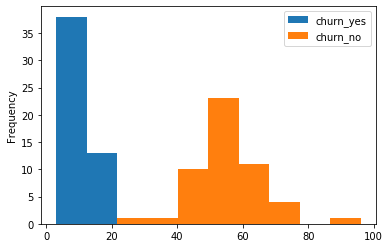

In [27]:
states_ch.plot.hist()

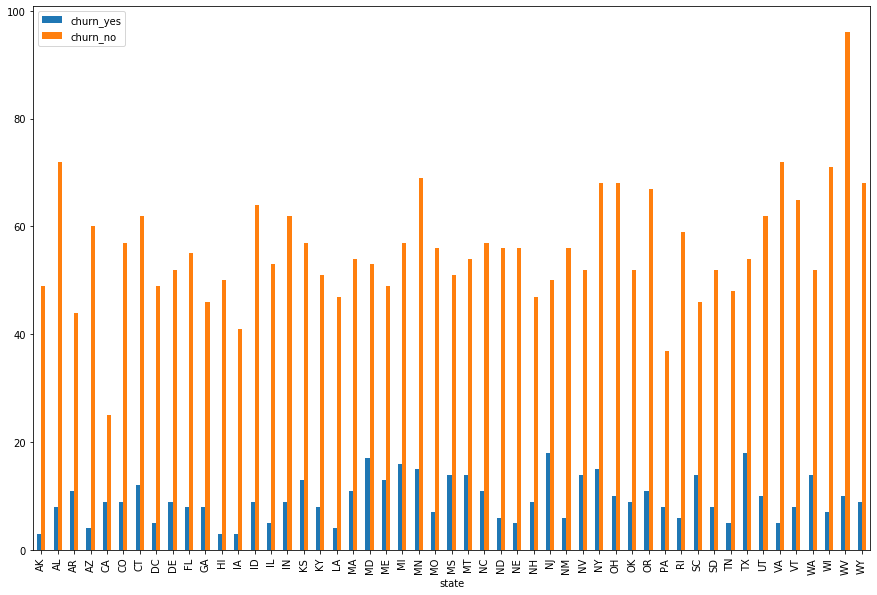

In [28]:

states_ch.plot(kind='bar', x='state', y=['churn_yes', 'churn_no'], figsize= (15, 10))

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
states_ch[['churn_yes', 'churn_no']] = scaler.fit_transform(states_ch[['churn_yes', 'churn_no']])

In [30]:
# states_ch

k2_y, p_y = stats.normaltest(states_ch['churn_yes'])
k2_n, p_n = stats.normaltest(states_ch['churn_no'])
print (p_y, p_n)

0.32346617946247175 0.0017060632887663878


state mmatters as the distribution is different

In [31]:
from scipy.stats import ks_2samp
ks_2samp(states_ch['churn_yes'], states_ch['churn_no'])

Ks_2sampResult(statistic=0.13725490196078433, pvalue=0.7280106739553731)

Решила посмотреть вдияет ли то фак, что клиент делал 'number vmail messages' на отток
Для простоты перевела из численной в label 
если звонки вообще были то 1, если нет то 0

In [32]:

data_telecom['number vmail messages oh'] = np.where(data_telecom['number vmail messages'] > 0, 1, 0)


/Users/Anna.Rudenko/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
data_telecom

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,churn,number vmail messages oh
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,0,1
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,0,1
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,0,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,0,1
3329,WV,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,0,0
3330,RI,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,0,0
3331,CT,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,0,0


In [34]:
import seaborn as sns

In [35]:
def count_plot(x, y, df, reverse = False):

    fig, axs = plt.subplots(1,3,  figsize=(15, 5))
    if reverse== True :
        for i in range(3):
            sns.countplot(ax=axs[i],x=y[i], hue=x, data=data_telecom,
                  palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
    else:
        for i in range(3):
            sns.countplot(ax=axs[i],x=x, hue=y[i], data=data_telecom,
                  palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')

#         axs[i].set_title(y[i])
    return plt.show()  

построила графички
International plan тесно связаны с churn
График. 'number vmail messages oh' очень похож на график 'voice mail plan'
поэтому выбросила колонки 'number vmail messages oh' и 'number vmail messages'

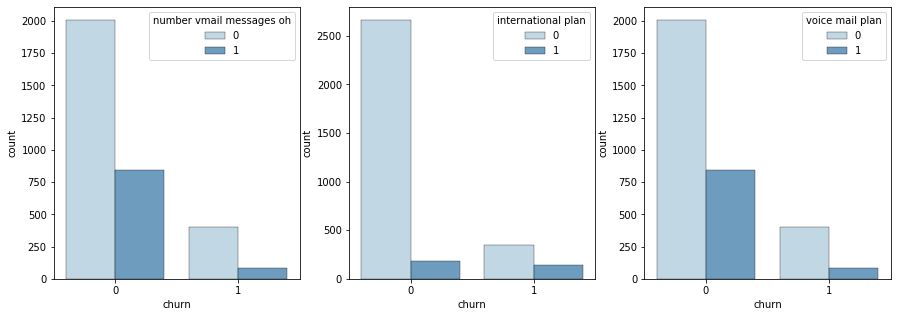

In [36]:
count_plot('churn', ['number vmail messages oh', 'international plan','voice mail plan'], data_telecom)



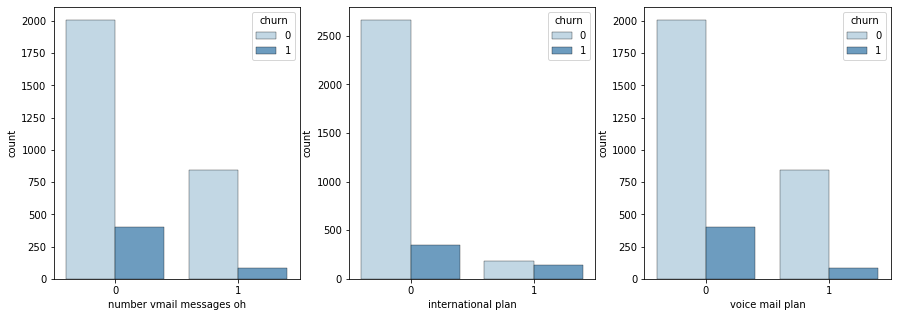

In [37]:
count_plot('churn', ['number vmail messages oh', 'international plan','voice mail plan'], 
           data_telecom, reverse =True)

international plan matters
we can leave only vmail plan and delete 'number vmail messages oh' and 'number vmail messages'

Перевела штаты в лэйблы

In [38]:
states = list(data_telecom.state.unique())

In [39]:
states.sort()

In [40]:
d_r = {x : states.index(x) for x in states}

In [41]:
data_telecom.state = data_telecom.state.replace(d_r)

/Users/Anna.Rudenko/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [42]:
data_telecom

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,churn,number vmail messages oh
0,16,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,0,1
1,35,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,0,1
2,31,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,0,0
4,36,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,0,1
3329,49,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,0,0
3330,39,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,0,0
3331,6,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,0,0


In [43]:
data_telecom.isnull().sum()

state                       0
account length              0
international plan          0
voice mail plan             0
number vmail messages       0
total day minutes           0
total day calls             0
total day charge            0
total eve minutes           0
total eve calls             0
total eve charge            0
total night minutes         0
total night calls           0
total night charge          0
total intl minutes          0
total intl calls            0
total intl charge           0
churn                       0
number vmail messages oh    0
dtype: int64

In [44]:
data_telecom.columns

Index(['state', 'account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'churn', 'number vmail messages oh'],
      dtype='object')

Стандартизация численных фич
Сначала с помощью preprocessing.RobustScaler() избавилась от outliers
Потом с помощью MinMaxScaler() масштабировала

In [45]:
numerical_features = ['account length', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge']

In [46]:
from sklearn import preprocessing

Rscaler = preprocessing.RobustScaler()
data_telecom[numerical_features] = Rscaler.fit_transform(data_telecom[numerical_features])


/Users/Anna.Rudenko/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/Anna.Rudenko/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [47]:
MMscaler = preprocessing.MinMaxScaler()
data_telecom[numerical_features] = MMscaler.fit_transform(data_telecom[numerical_features])

/Users/Anna.Rudenko/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Anna.Rudenko/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [48]:
data_telecom

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,churn,number vmail messages oh
0,16,0.524793,0,1,25,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0,1
1,35,0.438017,0,1,26,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0,1
2,31,0.561983,0,0,0,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0,0
3,35,0.342975,1,0,0,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0,0
4,36,0.305785,1,0,0,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,0.789256,0,1,36,0.445268,0.466667,0.445171,0.592521,0.741176,0.592688,0.688273,0.352113,0.688583,0.495,0.30,0.494444,0,1
3329,49,0.276860,0,0,0,0.658780,0.345455,0.658786,0.421776,0.323529,0.421870,0.452125,0.633803,0.452481,0.480,0.20,0.479630,0,0
3330,39,0.111570,0,0,0,0.515393,0.660606,0.515426,0.794061,0.341176,0.794241,0.453739,0.408451,0.454274,0.705,0.30,0.705556,0,0
3331,6,0.756198,1,0,0,0.609464,0.636364,0.609490,0.438823,0.494118,0.439016,0.311996,0.732394,0.312014,0.250,0.50,0.250000,0,0


In [49]:
data_telecom_clean = data_telecom[['state', 'international plan', 'voice mail plan', 'account length', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'churn']]

In [50]:
data_telecom_clean.churn.sum()

483

In [51]:
data_telecom_clean

,state,international plan,voice mail plan,account length,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,churn
0,16,0,1,0.524793,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0
1,35,0,1,0.438017,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0
2,31,0,0,0.561983,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0
3,35,1,0,0.342975,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0
4,36,1,0,0.305785,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,0,1,0.789256,0.445268,0.466667,0.445171,0.592521,0.741176,0.592688,0.688273,0.352113,0.688583,0.495,0.30,0.494444,0
3329,49,0,0,0.276860,0.658780,0.345455,0.658786,0.421776,0.323529,0.421870,0.452125,0.633803,0.452481,0.480,0.20,0.479630,0
3330,39,0,0,0.111570,0.515393,0.660606,0.515426,0.794061,0.341176,0.794241,0.453739,0.408451,0.454274,0.705,0.30,0.705556,0
3331,6,1,0,0.756198,0.609464,0.636364,0.609490,0.438823,0.494118,0.439016,0.311996,0.732394,0.312014,0.250,0.50,0.250000,0


Разбивка на трэйн/тест

In [52]:
from sklearn.model_selection import train_test_split

X1 = data_telecom_clean.drop('churn', axis=1)
X = X1.values
y = data_telecom_clean['churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score


In [54]:

from sklearn.linear_model import LogisticRegression

Сначала обычная лог регрессия

In [55]:
w = {0:0.2, 1:0.001}

# Instanciate and train the logistic regression model based on the training set.
logreg = LogisticRegression(max_iter=100,class_weight='balanced')
logreg.fit(X_train, y_train)

/Users/Anna.Rudenko/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)


In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_prob[:,1])

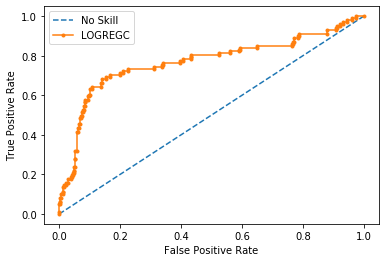

In [58]:
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='LOGREGC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [59]:
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(thresholds, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]['threshold'].values[0]

Былв попытка подобпрать трешхолд через рок кривую
Не очень успешно

In [60]:
THRESHOLD = roc_t
pred_lr = np.where(y_pred_logreg_prob[:,1] > THRESHOLD, 1, 0)

In [61]:
f1_score(y_test, y_pred_logreg), f1_score(y_test, pred_lr)

(0.4915824915824917, 0.4850498338870432)

In [62]:
precision_score(y_test, y_pred_logreg), precision_score(y_test, pred_lr)


(0.37244897959183676, 0.365)

In [63]:
recall_score(y_test, y_pred_logreg), recall_score(y_test, pred_lr)

(0.7227722772277227, 0.7227722772277227)

In [64]:
roc_auc_score(y_test, y_pred_logreg_prob[:,1]), roc_auc_score(y_test, pred_lr)

(0.7690585312948256, 0.7491953258930133)

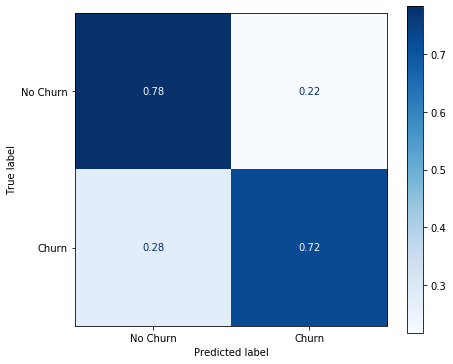

In [65]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(logreg, X_test, y_test, display_labels=["No Churn", "Churn"],
                      cmap=plt.cm.Blues, normalize='true', ax=ax)

Text(0.5, 1.0, '2-class Precision-Recall curve')

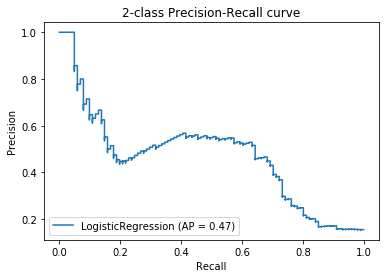

In [66]:


disp = plot_precision_recall_curve(logreg, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

Теперь тьюним с помощью GridSearchCV

In [67]:

logreg_grid = {'penalty': ['l1', 'l2'], 'C': np.arange(0.1, 0.5, 1.)}
logreg_tuned = LogisticRegression(solver='saga', max_iter=1000, class_weight='balanced')   
logreg_tuned_gs = GridSearchCV(logreg_tuned, logreg_grid, cv=5)
logreg_tuned_gs.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_logreg_tuned = logreg_tuned_gs.predict(X_test)
y_pred_logreg_tuned_prob = logreg_tuned_gs.predict_proba(X_test)

print('Logistic Regression - Best Parameters: ', logreg_tuned_gs.best_params_)

Logistic Regression - Best Parameters:  {'C': 0.1, 'penalty': 'l1'}


In [68]:
f1_score(y_test, y_pred_logreg_tuned)

0.5085910652920962

In [69]:
precision_score(y_test, y_pred_logreg_tuned)

0.3894736842105263

In [70]:
recall_score(y_test, y_pred_logreg_tuned)

0.7326732673267327

In [71]:
roc_auc_score(y_test, y_pred_logreg_tuned_prob[:,1]),

(0.7666794948046041,)

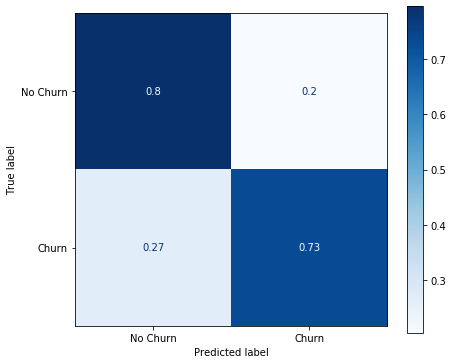

In [72]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(logreg_tuned_gs, X_test, y_test, display_labels=["No Churn", "Churn"],
                      cmap=plt.cm.Blues, normalize='true', ax=ax)

Text(0.5, 1.0, '2-class Precision-Recall curve LOG REG TUNED')

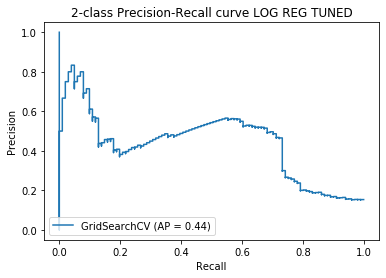

In [73]:


disp = plot_precision_recall_curve(logreg_tuned_gs, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve LOG REG TUNED')

Тьюненная модель вроде бы лучше но не намного

Ещё один классификатор -случайный лес

In [74]:
from sklearn.ensemble import RandomForestClassifier

w = {0:1, 1:99}
# Instanciate and train the random forest model based on the training set.
rf = RandomForestClassifier(class_weight = 'balanced', max_depth=3)
rf.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_prob[:, 1])

In [76]:
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(thresholds, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]['threshold'].values[0]

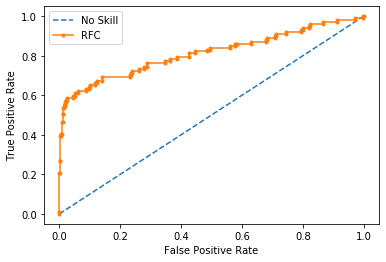

In [77]:
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='RFC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [78]:
roc_t

0.411480986350452

тут через рок кривую результаты с трешхолдом наоборот ухудшили, поэтому подбирадла ручками трешхолд
получилось улучшить модель THRESHOLD = 0.6

In [86]:
THRESHOLD = 0.6
pred_rf = np.where(y_pred_rf_prob[:,1] > THRESHOLD, 1, 0)

In [87]:
precision_score(y_test, y_pred_rf), precision_score(y_test, pred_rf)

(0.46258503401360546, 0.6941176470588235)

In [88]:
recall_score(y_test, y_pred_rf), precision_score(y_test, pred_rf)

(0.6732673267326733, 0.6941176470588235)

In [89]:
roc_auc_score(y_test, y_pred_rf), roc_auc_score(y_test, pred_rf)

(0.7668456775006123, 0.7691110100409334)

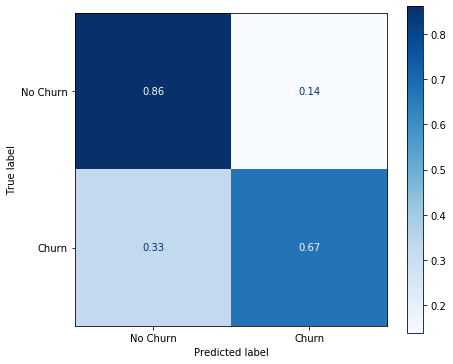

In [90]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(rf, X_test, y_test, display_labels=["No Churn", "Churn"],
                      cmap=plt.cm.Blues, normalize='true', ax=ax)

Text(0.5, 1.0, '2-class Precision-Recall curve')

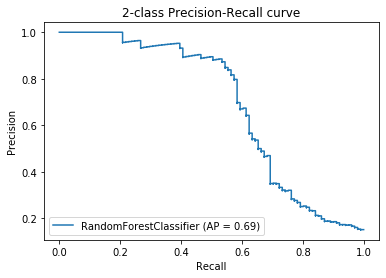

In [91]:


disp = plot_precision_recall_curve(rf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

Даже незатьюненный Случайный лес отыгрывает лучше

Но попробуем грид серч

так как параметров сверять больше будем юзать его вариацию как RandomizedSearchCV

In [92]:
grid_rf = {'n_estimators': np.arange(10, 1000, 10), 
                 
                 'max_depth': np.arange(1, 10, 1),
                 
                 'bootstrap': [True, False]}

rf = RandomForestClassifier(class_weight = 'balanced')
rf_tuned = RandomizedSearchCV(estimator=rf, param_distributions=grid_rf, cv=5, verbose=0)
rf_tuned.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf_tuned = rf_tuned.predict(X_test)
y_pred_rf_tuned_prob = rf_tuned.predict_proba(X_test)



In [93]:
print('Random Forest - Best Parameters: ', rf_tuned.best_params_)

Random Forest - Best Parameters:  {'n_estimators': 190, 'max_depth': 9, 'bootstrap': True}


Опять ручками поподбирался трешхолд который может улучшить метрики


In [94]:
THRESHOLD = 0.43
pred_tuned_rf = np.where(y_pred_rf_tuned_prob[:,1] > THRESHOLD, 1, 0)

In [95]:
precision_score(y_test, y_pred_rf_tuned), precision_score(y_test, pred_tuned_rf)

(0.953125, 0.8157894736842105)

In [96]:
recall_score(y_test, y_pred_rf_tuned), recall_score(y_test, pred_tuned_rf) 

(0.6039603960396039, 0.6138613861386139)

In [97]:
roc_auc_score(y_test, y_pred_rf_tuned), roc_auc_score(y_test, pred_tuned_rf)

(0.7993300213413568, 0.7945632019032293)

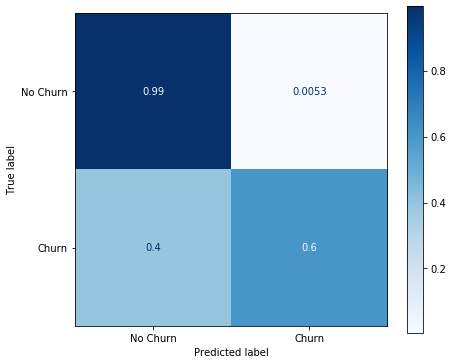

In [98]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(rf_tuned, X_test, y_test, display_labels=["No Churn", "Churn"],
                      cmap=plt.cm.Blues, normalize='true', ax=ax)

Text(0.5, 1.0, '2-class Precision-Recall curve')

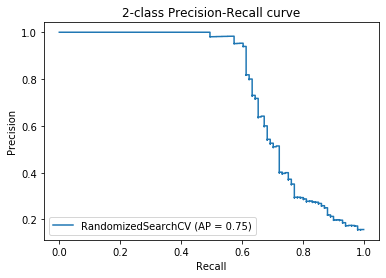

In [99]:


disp = plot_precision_recall_curve(rf_tuned, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

Затьюненный лесс хорошо предсказывает
